In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\text0\AppData\Local\Programs\Microsoft VS Code\Dataset .csv')

# Check for missing values
print(df.isnull().sum())

# Impute missing values with mean
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].mean())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode cuisine and price_range
le = LabelEncoder()
df['cuisine_encoded'] = le.fit_transform(df['Cuisines'])
df['price_range_encoded'] = le.fit_transform(df['Price range'])

In [22]:
def get_recommendations(cuisine_preference, price_range_preference):
    # Filter restaurants based on user preferences
    filtered_df = df[(df['cuisine_encoded'] == cuisine_preference) &
                     (df['price_range_encoded'] == price_range_preference)].copy()

    # Calculate similarity scores based on cuisine and price range
    filtered_df['similarity_scores'] = (filtered_df['cuisine_encoded'] == cuisine_preference) * 0.5 + (filtered_df['price_range_encoded'] == price_range_preference) * 0.5

    # Ensure 'name' column is included in filtered_df
    N = 5
    recommended_restaurants = filtered_df.nlargest(N, 'similarity_scores')['Restaurant Name'].tolist()

    return recommended_restaurants


In [23]:
# Sample user preferences
cuisine_preference = 2  # Italian
price_range_preference = 1  # Mid-range

# Get recommended restaurants
recommended_restaurants = get_recommendations(cuisine_preference, price_range_preference)

print("Recommended restaurants:")
print(recommended_restaurants)

Recommended restaurants:
['Al Fanoos']


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\text0\AppData\Local\Programs\Microsoft VS Code\Dataset .csv')

# Check the column names
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [32]:
# Assuming you have the recommended restaurants and actual restaurants
if 'Restaurant Name' in df.columns:
    recommended_restaurants = df['Restaurant Name'].tolist()
    actual_restaurants = df['Restaurant Name'].tolist()  # Replace with actual actual restaurants
else:
    print("The column 'Restaurant Name' does not exist in the dataset.")

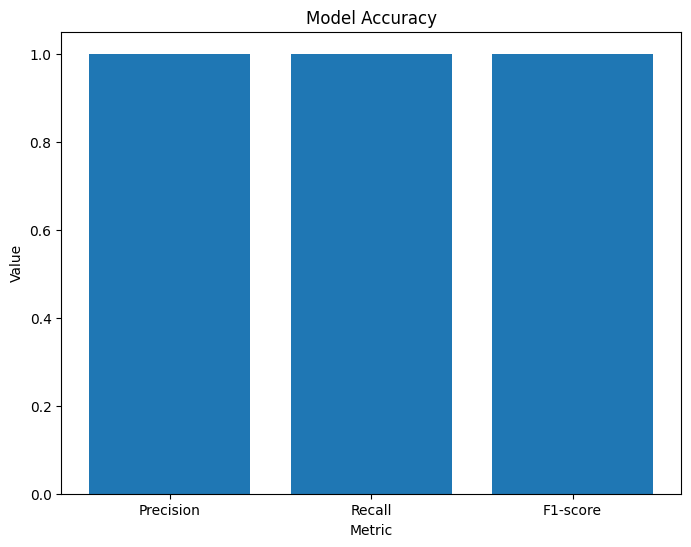

In [33]:
 # You can add code here to handle this situation

true_positives = len(set(recommended_restaurants) & set(actual_restaurants))
false_positives = len(set(recommended_restaurants) - set(actual_restaurants))
false_negatives = len(set(actual_restaurants) - set(recommended_restaurants))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives)!= 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives)!= 0 else 0

if precision + recall!= 0:
    f1 = 2 * (precision * recall) / (precision + recall)
else:
    f1 = 0

metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(metrics, values)
plt.title('Model Accuracy')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()